## Sagnac Frequency - MLTI Statistics

Explore the statistics of the MLTI boosts

## Imports

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime, date
from pandas import DataFrame, read_pickle, date_range, concat, read_csv
from obspy import UTCDateTime, read, Trace
from scipy.signal import hilbert


In [2]:
from functions.load_mlti import __load_mlti
from functions.get_mlti_intervals import __get_mlti_intervals
from functions.load_beat import __load_beat

In [3]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/bay200/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'
elif os.uname().nodename == 'lin-ffb-01':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'

## Configurations

In [4]:
config = {}

config['tbeg'] = UTCDateTime("2023-09-01 00:00")
config['tend'] = UTCDateTime("2023-12-31 00:00")

config['path_to_figs'] = data_path+"sagnac_frequency/figures/"

## Load MLTI times

Load MLTI logfiles for rings

In [5]:
mltiU = __load_mlti(config['tbeg'], config['tend'], "U", archive_path)

In [6]:
mltiZ = __load_mlti(config['tbeg'], config['tend'], "Z", archive_path)

In [7]:
mltiV = __load_mlti(config['tbeg'], config['tend'], "V", archive_path)

Generate time intervals of MLTI boosts from log files

In [24]:
tdelta = 100

mltiU_t1, mltiU_t2 = __get_mlti_intervals(mltiU.time_utc, time_delta=tdelta)
mltiZ_t1, mltiZ_t2 = __get_mlti_intervals(mltiZ.time_utc, time_delta=tdelta)
mltiV_t1, mltiV_t2 = __get_mlti_intervals(mltiV.time_utc, time_delta=tdelta)


Compute Inter MLTI durations

In [35]:
dt = 60

durationU = ( mltiU_t2 - mltiU_t1 ) / dt
durationV = ( mltiV_t2 - mltiV_t1 ) / dt
durationZ = ( mltiZ_t2 - mltiZ_t1 ) / dt


### Plotting

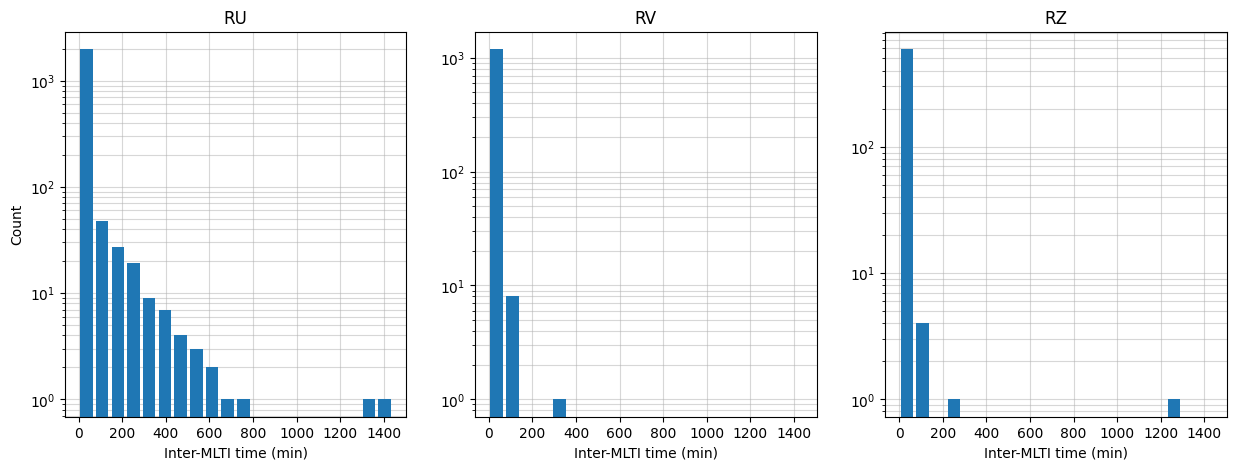

In [40]:
def __makeplot():

    Nrow, Ncol = 1, 3

    font = 12

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 5), sharex=True)

    plt.subplots_adjust(hspace=0.1)

    nbins = 20
    rmax = 1440

    ax[0].hist(durationU, bins=nbins, range=(0, rmax), log=True, rwidth=0.8, zorder=2)
    ax[1].hist(durationV, bins=nbins, range=(0, rmax), log=True, rwidth=0.8, zorder=2)
    ax[2].hist(durationZ, bins=nbins, range=(0, rmax), log=True, rwidth=0.8, zorder=2)

    ax[0].set_ylabel("Count")

    for i, ring in enumerate(["RU", "RV", "RZ"]):
        ax[i].set_xlabel("Inter-MLTI time (min)")
        ax[i].set_title(ring)
        ax[i].grid(which="both", zorder=0, alpha=0.5)

    plt.show();
    return fig

fig = __makeplot();
